# CS 109A
# Final Project- EDA Milestone 3

# Will Cho, Haruka Uchida, Jessica Zhao


Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import pydotplus
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib import colors
import seaborn as sns
%matplotlib inline

In [2]:
#########################
### Read in Data ########
#########################

# if want to use ID number as the index, index_col = 'RID'
df = pd.read_csv('Data_Database/ADNIMERGE.csv')

#################################
### Get all Column Names ########
#################################

all_variables_first = list(df.columns.values)

#################################
### Make Dummy Variables ########
#################################

# there are probably more categoricals need to add to this array
categorical_col = ['DX', 'PTGENDER']
df = pd.get_dummies(df, columns=categorical_col)
# make list of all variables, including dummy variables
all_variables_dum = list(df.columns.values)
len(all_variables_dum)

97

In [3]:
###########################################
### Make Training and test data frames ####
###########################################

np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.5
df_train = df[msk]
df_test = df[~msk]

In [4]:
#################################
### Basic Summary Stats #########
#################################

df.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,CDRSB,ADAS11,...,AV45_bl,Years_bl,Month_bl,Month,M,DX_CN,DX_Dementia,DX_MCI,PTGENDER_Female,PTGENDER_Male
count,13017.000000,13017.000000,13017.000000,13017.000000,12958.000000,3353.000000,223.000000,2161.000000,9016.000000,8959.000000,...,5969.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000
mean,2285.200584,73.892064,73.767220,15.994930,0.535654,1.208225,1.783161,1.195504,2.163598,11.398507,...,1.200700,2.235266,26.768221,26.688868,26.498041,0.213106,0.162096,0.312284,0.436199,0.563801
std,1871.013213,110.533877,6.979685,2.824862,0.655480,0.160972,0.422511,0.227999,2.805879,8.616859,...,0.221538,2.225071,26.646135,26.609785,26.398907,0.409518,0.368553,0.463443,0.495932,0.495932
min,2.000000,2.000000,54.400000,4.000000,0.000000,0.636804,1.095000,0.814555,0.000000,0.000000,...,0.838537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,631.000000,21.000000,69.500000,14.000000,0.000000,1.109730,1.361250,1.010140,0.000000,5.330000,...,1.018950,0.498289,5.967210,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1301.000000,41.000000,73.700000,16.000000,0.000000,1.219870,1.850000,1.114670,1.000000,9.000000,...,1.120310,1.524980,18.262300,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4353.000000,116.000000,78.600000,18.000000,1.000000,1.314320,2.127500,1.364980,3.000000,15.000000,...,1.374980,3.091030,37.016400,36.000000,36.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,6094.000000,941.000000,91.400000,20.000000,2.000000,1.753320,2.927500,2.669210,18.000000,70.000000,...,2.025560,11.036300,132.164000,132.000000,126.000000,1.000000,1.000000,1.000000,1.000000,1.000000


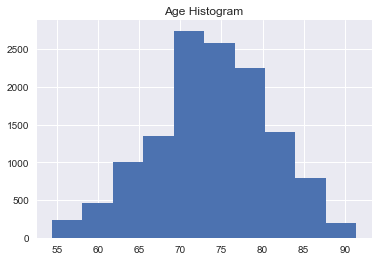

In [5]:
###############################
### EDA- Histograms: Age ######
###############################

plt.title('Age Histogram')
plt.hist(df.AGE)
plt.show()

In [6]:
print("Min Patient Age", min(df['AGE']))
print("Max Patient Age", max(df['AGE']))
print("Mean Patient Age", np.mean(df['AGE']))

Min Patient Age 54.4
Max Patient Age 91.4
Mean Patient Age 73.76721978950721


In [7]:
#################################################
### Summary Statistics: Frequency Tables ########
#################################################

print(pd.crosstab(index=df['PTGENDER_Male'], columns="count")['count'],'\n')
print(pd.crosstab(index=df['PTETHCAT'], columns="count")['count'],'\n')
print(pd.crosstab(index=df['PTRACCAT'], columns="count")['count'],'\n')
print(pd.crosstab(index=df['PTMARRY'], columns="count")['count'])

PTGENDER_Male
0    5678
1    7339
Name: count, dtype: int64 

PTETHCAT
Hisp/Latino          360
Not Hisp/Latino    12596
Unknown               61
Name: count, dtype: int64 

PTRACCAT
Am Indian/Alaskan       20
Asian                  227
Black                  503
Hawaiian/Other PI        8
More than one          119
Unknown                 19
White                12121
Name: count, dtype: int64 

PTMARRY
Divorced         1043
Married          9973
Never married     395
Unknown            51
Widowed          1555
Name: count, dtype: int64


In [8]:
# shows True for NaNs
# df.isnull()

df.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTEDUCAT,...,Years_bl,Month_bl,Month,M,update_stamp,DX_CN,DX_Dementia,DX_MCI,PTGENDER_Female,PTGENDER_Male
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,16,...,0.000000,0.00000,0,0,2017-08-13 23:50:48.0,1,0,0,0,1
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,18,...,0.000000,0.00000,0,0,2017-08-13 23:50:48.0,0,1,0,0,1
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,18,...,0.498289,5.96721,6,6,2017-08-13 23:50:48.0,0,1,0,0,1
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,18,...,0.999316,11.96720,12,12,2017-08-13 23:50:48.0,0,1,0,0,1
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,18,...,1.998630,23.93440,24,24,2017-08-13 23:50:48.0,0,1,0,0,1


In [9]:
# for now, we will fill missing values with 0s
# replace NaNs with 0s
df.fillna(0)

# make list of predictors used in model predicting risk of getting Alzheimer's
names_use = list(df_train.columns.values)
# remove DX_Dementia because it is what we want to predict
names_use.remove('DX_Dementia')
# remove unnecessary predictors. will not be used in model
names_use.remove('update_stamp')


####################################
### Make Training and test sets ####
####################################
X_train = df_train[names_use].values
X_test = df_test[names_use].values

y_train = df_train['DX_Dementia'].values
y_test = df_test['DX_Dementia'].values

names = df_train.columns.values

In [10]:
# # heatmap - needs tweaking

# cols_of_interest = ["DX_Dementia","EcogSPTotal_bl", "EcogPtTotal_bl", "EcogPtTotal"]
# heat_df = df_train[cols_of_interest]
# heat_df = heat_df.sort_values(by=["DX_Dementia"])
# sns.heatmap(heat_df)

In [11]:
# using RF to get a sense of importance of features
from sklearn.ensemble import RandomForestClassifier

# Build the model
rfc = RandomForestClassifier()

# # Fit the model - NEED TO FACTORIZE BEFORE THIS WORKS


# rfc.fit(X_train, y_train)

# ###############################################


# importance = rfc.feature_importances_ 
# sorted_importances = np.argsort(importance)

# # Insert padding
# padding = np.arange(len(names)-1) + 0.5

# plt.barh(padding, importance[sorted_importances], align='center')
# plt.yticks(padding, names[sorted_importances])
# plt.xlabel("Rel Importance")
# plt.title("Var Importance")
# plt.show()

In [12]:
# Import modules
from bokeh.charts import Scatter, show

# Construct the scatter plot
plotting = Scatter(df_train, x='PTGENDER_Male', y='AGE', color="DX_Dementia", title="Gender vs Age",
            xlabel="Male = 1", ylabel="Age", legend = "top_center")

show(plotting)
# color is by DX_Dementia, outcome var

/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


In [13]:
# show correlations

df_train.corr()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,CDRSB,ADAS11,...,AV45_bl,Years_bl,Month_bl,Month,M,DX_CN,DX_Dementia,DX_MCI,PTGENDER_Female,PTGENDER_Male
RID,1.000000,0.033600,-0.174932,0.078070,0.027899,0.158251,0.215816,0.044844,-0.101310,-0.101705,...,0.089876,-0.326282,-0.326282,-0.325149,-0.324938,0.017905,-0.077733,-0.006059,0.065975,-0.065975
SITE,0.033600,1.000000,0.034513,-0.002274,-0.064645,0.050557,-0.220526,-0.037426,-0.055487,-0.066365,...,-0.044919,-0.013404,-0.013404,-0.013300,-0.012760,0.011163,-0.047967,0.023304,-0.007086,0.007086
AGE,-0.174932,0.034513,1.000000,-0.064386,-0.132993,-0.097671,-0.154704,0.134622,0.047748,0.073844,...,0.179260,0.033594,0.033594,0.033816,0.033018,0.031994,0.038531,-0.063000,-0.084914,0.084914
PTEDUCAT,0.078070,-0.002274,-0.064386,1.000000,-0.069181,0.084480,0.028148,-0.107851,-0.108140,-0.148611,...,-0.101629,0.014117,0.014117,0.014711,0.013138,0.082708,-0.100668,-0.014100,-0.191520,0.191520
APOE4,0.027899,-0.064645,-0.132993,-0.069181,1.000000,-0.267988,0.480874,0.432251,0.293238,0.298445,...,0.410652,-0.060305,-0.060305,-0.060971,-0.060137,-0.207003,0.217997,0.010972,-0.033790,0.033790
FDG,0.158251,0.050557,-0.097671,0.084480,-0.267988,1.000000,-0.284452,-0.382926,-0.630023,-0.646100,...,-0.406505,-0.090678,-0.090678,-0.091142,-0.089973,0.383737,-0.549696,0.101429,0.008134,-0.008134
PIB,0.215816,-0.220526,-0.154704,0.028148,0.480874,-0.284452,1.000000,NaN,0.287354,0.296899,...,NaN,0.158696,0.158696,0.148585,0.157380,-0.291914,0.253086,0.000979,0.019992,-0.019992
AV45,0.044844,-0.037426,0.134622,-0.107851,0.432251,-0.382926,NaN,1.000000,0.371413,0.378310,...,0.963427,-0.048321,-0.048321,-0.049966,-0.049163,-0.251350,0.364812,-0.034797,0.040774,-0.040774
CDRSB,-0.101310,-0.055487,0.047748,-0.108140,0.293238,-0.630023,0.287354,0.371413,1.000000,0.806693,...,0.401272,0.130352,0.130353,0.130036,0.130649,-0.493706,0.690676,-0.171853,-0.024452,0.024452
ADAS11,-0.101705,-0.066365,0.073844,-0.148611,0.298445,-0.646100,0.296899,0.378310,0.806693,1.000000,...,0.445851,0.023202,0.023202,0.022939,0.023346,-0.455775,0.668872,-0.142993,-0.020013,0.020013


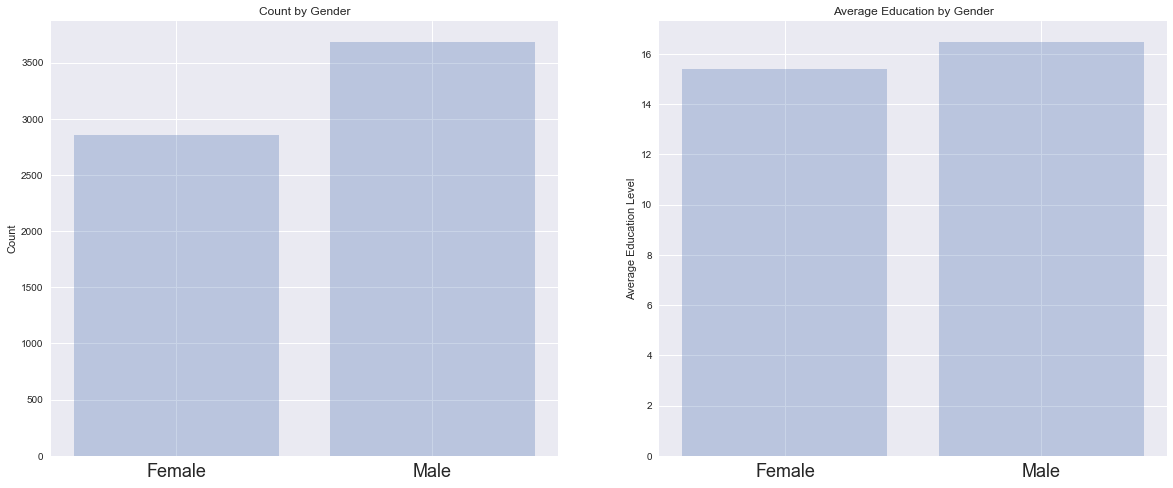

In [14]:
# Scatter Plot of Count by Gender
fig, ax = plt.subplots(1, 2, figsize = (20,8))

Gen_Labels = ["Female","Male"]

femaleTrainData = df_train[df_train["PTGENDER_Female"] == 1]
maleTrainData = df_train[df_train["PTGENDER_Male"] == 1]

female_num = len(femaleTrainData)
male_num = len(maleTrainData)

female_edu = np.mean(femaleTrainData['PTEDUCAT'])
male_edu = np.mean(maleTrainData['PTEDUCAT'])

xAxis = [0,1]

ax[0].bar(xAxis,[female_num,male_num],alpha=0.3)
ax[0].set_title('Count by Gender')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(Gen_Labels, fontsize=18)

ax[1].bar(xAxis,[female_edu,male_edu],alpha=0.3)
ax[1].set_title('Average Education by Gender')
ax[1].set_ylabel('Average Education Level')
ax[1].set_xticklabels(Gen_Labels, fontsize=18)

plt.setp(ax, xticks=xAxis, xticklabels=Gen_Labels)
plt.show()

In [15]:
print("Difference between average education level for male vs female patients (year):", male_edu - female_edu)

Difference between average education level for male vs female patients (year): 1.0956207340829458


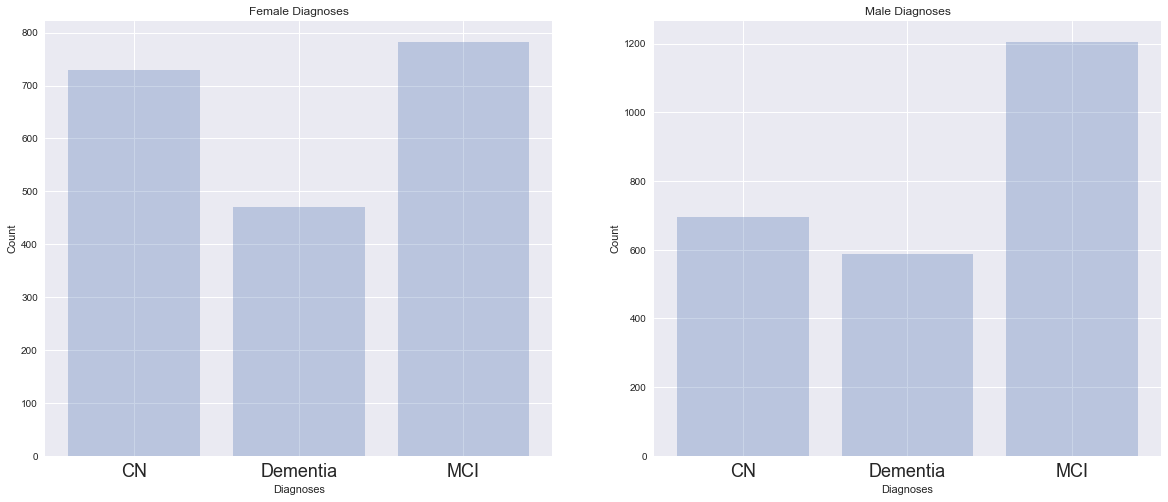

In [16]:
# Scatter Plot of Diagnoses by Gender
fig, ax = plt.subplots(1, 2, figsize = (20,8))

diagnosisLabels = ["CN","Dementia","MCI"]

femaleCN = len(femaleTrainData[femaleTrainData["DX_CN"] == 1])
femaleDementia = len(femaleTrainData[femaleTrainData["DX_Dementia"] == 1])
femaleMCI = len(femaleTrainData[femaleTrainData["DX_MCI"] == 1])

maleCN = len(maleTrainData[maleTrainData["DX_CN"] == 1])
maleDementia = len(maleTrainData[maleTrainData["DX_Dementia"] == 1])
maleMCI = len(maleTrainData[maleTrainData["DX_MCI"] == 1])

xAxis = [0,1,2]

ax[0].bar(xAxis,[femaleCN,femaleDementia,femaleMCI],alpha=0.3)
ax[0].set_title('Female Diagnoses')
ax[0].set_xlabel('Diagnoses')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(diagnosisLabels, fontsize=18)

ax[1].bar(xAxis,[maleCN,maleDementia,maleMCI],alpha=0.3)
ax[1].set_title('Male Diagnoses')
ax[1].set_xlabel('Diagnoses')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(diagnosisLabels, fontsize=18)

plt.setp(ax, xticks=xAxis, xticklabels=diagnosisLabels)
plt.show()

In [17]:
# Counting Diagnoses by Race
raceLabels = df_train.PTRACCAT.unique()
CNbyRace = []
DementiabyRace = []
MCIbyRace = []

for raceLabel in raceLabels:
    raceDf_train = df_train[df_train["PTRACCAT"] == raceLabel]
    CNbyRace.append(len(raceDf_train[raceDf_train["DX_CN"] == 1]))
    DementiabyRace.append(len(raceDf_train[raceDf_train["DX_Dementia"] == 1]))
    MCIbyRace.append(len(raceDf_train[raceDf_train["DX_MCI"] == 1]))

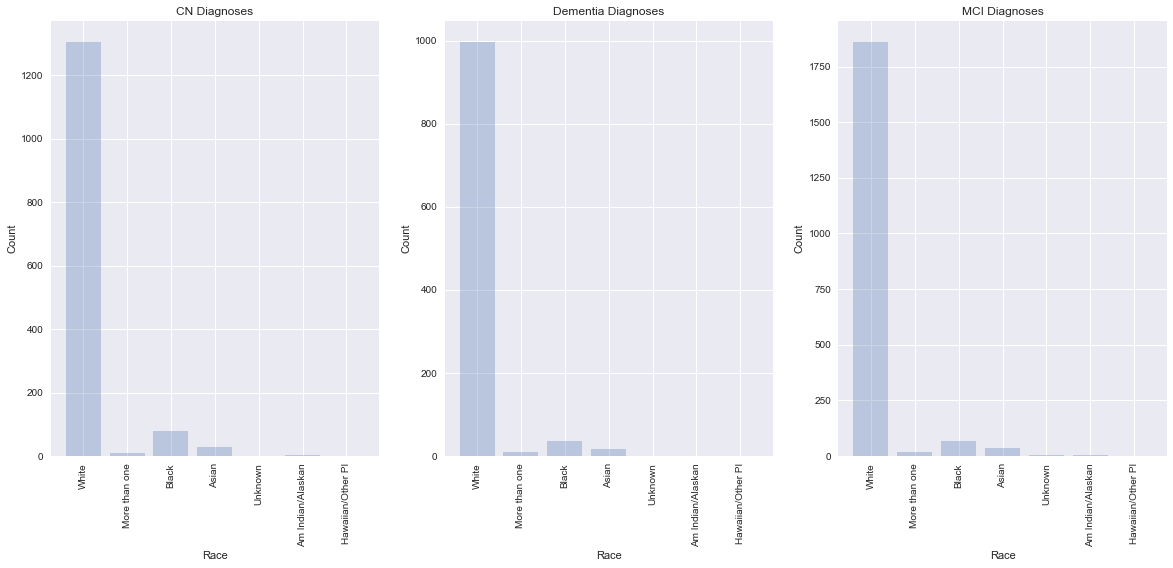

In [18]:
# Scatter Plot of Delays by Date
fig, ax = plt.subplots(1, 3, figsize = (20,8))

xAxis = np.arange(len(raceLabels))

ax[0].bar(xAxis,CNbyRace,alpha=0.3)
ax[0].set_title('CN Diagnoses')
ax[0].set_xlabel('Race')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(raceLabels, rotation='vertical', fontsize=10)
ax[1].bar(xAxis,DementiabyRace,alpha=0.3)
ax[1].set_title('Dementia Diagnoses')
ax[1].set_xlabel('Race')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(raceLabels, rotation='vertical', fontsize=10)
ax[2].bar(xAxis,MCIbyRace,alpha=0.3)
ax[2].set_title('MCI Diagnoses')
ax[2].set_xlabel('Race')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(raceLabels, rotation='vertical', fontsize=10)

plt.setp(ax, xticks=xAxis, xticklabels=raceLabels)
plt.show()

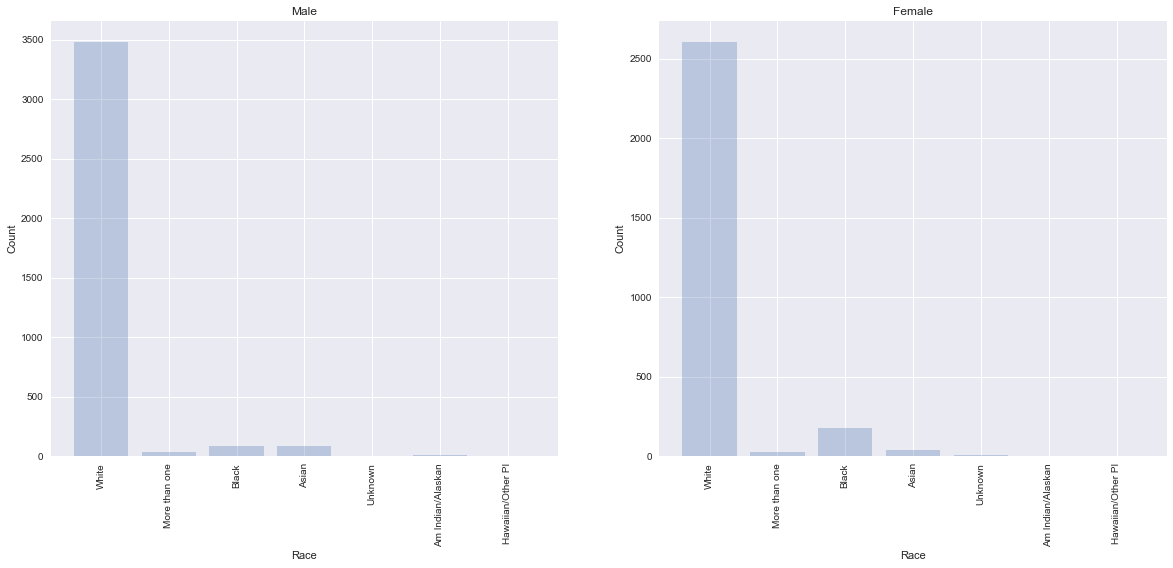

In [19]:
# Race & Gender breakdown charts

fig, ax = plt.subplots(1, 2, figsize = (20,8))
# use raceLabels = df_train.PTRACCAT.unique() as above
male_race = []
female_race = []

for raceLabel in raceLabels:
    raceDf_train = df_train[df_train["PTRACCAT"] == raceLabel]
    female_race.append(len(raceDf_train[raceDf_train["PTGENDER_Female"] == 1]))
    male_race.append(len(raceDf_train[raceDf_train["PTGENDER_Male"] == 1]))

ax[0].bar(xAxis,male_race,alpha=0.3)
ax[0].set_title('Male')
ax[0].set_xlabel('Race')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(raceLabels, rotation='vertical', fontsize=10)
ax[1].bar(xAxis,female_race,alpha=0.3)
ax[1].set_title('Female')
ax[1].set_xlabel('Race')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(raceLabels, rotation='vertical', fontsize=10)

plt.setp(ax,xticks=xAxis, xticklabels=raceLabels)
plt.show()

In [20]:
df.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTEDUCAT,...,Years_bl,Month_bl,Month,M,update_stamp,DX_CN,DX_Dementia,DX_MCI,PTGENDER_Female,PTGENDER_Male
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,16,...,0.000000,0.00000,0,0,2017-08-13 23:50:48.0,1,0,0,0,1
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,18,...,0.000000,0.00000,0,0,2017-08-13 23:50:48.0,0,1,0,0,1
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,18,...,0.498289,5.96721,6,6,2017-08-13 23:50:48.0,0,1,0,0,1
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,18,...,0.999316,11.96720,12,12,2017-08-13 23:50:48.0,0,1,0,0,1
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,18,...,1.998630,23.93440,24,24,2017-08-13 23:50:48.0,0,1,0,0,1


In [21]:
#############################################
### Make Var for whether have Alz or not ####
#############################################

#currently the diagnosis variables = 1 if has any form of dementia
#want to make dummy variable for if they report having alzheimers (not any other type)

alz_at_moment = []
# for each observation in the dataset
for observation in range(len(df.index)):
    if df['DX_bl'][observation] == 'AZ':
        alz_at_moment.append(1)
    else:
        alz_at_moment.append(0)
df['alz_at_moment'] = alz_at_moment

In [22]:
#############################
## Make Predictor Variable ##
#############################

# since data is longitudinal, will make a "did they ever get alzheimers" variable
# make a list of the alzheimer dummy values for that patient
#[visit for visit in list(df['DX_Dementia'].groupby(df['PTID']))[1]]
got_alz = []
#for every unique patient
for name, group in df.groupby('PTID'):
    # list of patient's alzheimer dummy values (since longitudinal)
    unique_patient_alz = group['alz_at_moment'].values
    # get 'max' of alzheimers dummy
    # therefore those with max = 1 have reported getting alzheimers in their life
    # those with max = 0 never got alzheimers
    got_alz = got_alz + [max(unique_patient_alz)] * len(unique_patient_alz)

#add it to the dataframe
df['got_alz'] = got_alz

In [23]:
######################################
### Make Age at Exam Date Variable ###
######################################

age_at_examdate = []
# for each observation in the dataset
for observation in range(len(df.index)):
    # age at exam date is 'age at base line' + 'years from baseline'
    age_at_examdate.append(df['AGE'][observation] + df['Years_bl'][observation])
df['age_at_examdate'] = age_at_examdate

#Now we can get rid of the 'years since baseline' variable
del df['Years_bl']

In [24]:
#############################################################
## scaling test set and training set continuous variables ###
#############################################################
numerical_columns = ['DISTANCE', 'SCHEDULED_TIME', 'DISTANCE_sq', 'SCHEDULED_TIME_sq']
for var in numerical_columns:
    mean = df_train[var].mean()
    std = df_train[var].std()

    df_train[var] = (df_train[var] - mean)/std
    df_test[var] = (df_test[var] - mean)/std

KeyError: 'DISTANCE'

In [ ]:
########################################################
### Prediction Model: Risk of Developing Alzheimers ####
########################################################

# Build a classification model that classifies patients for eventually developing alz or not

# This is an unbalanced dataset!!!!!!

#y_train_risk = df_train['got_alz'].values
#X_train_risk = df_train[risk_predictors].values

#y_test_risk = df_test['got_alz'].values
#X_test_risk = df_test[risk_predictors].values

## will try 4 different models and compare to decide which is best:
## 1. logistic regression
## 2. k-NN
## 3. LDA/QDA
## 4. Decision Trees